<a href="https://colab.research.google.com/github/leahandofir/earthformer-inference-experiments/blob/main/working_with_h5_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl 'https://raw.githubusercontent.com/leahandofir/earthformer-inference-experiments/main/google_collab_experiments/prerequisites.sh' -o ./prerequisites.sh
!bash ./prerequisites.sh

In [ ]:
!aws s3 ls --no-sign-request s3://sevir/data/vil --recursive --human-readable --region us-west-2

In [3]:
!aws s3 cp --no-sign-request --region us-west-2 s3://sevir/data/vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5 ~/vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5

download: s3://sevir/data/vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5 to ../root/vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5


In [5]:
import numpy as np
import h5py

hf = h5py.File('../root/vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5', 'r')

print(f"keys: {hf.keys()}")

keys: <KeysViewHDF5 ['id', 'vil']>


In [6]:
hf_id = hf.get('id')
hf_vil = hf.get('vil')

In [8]:
print(hf_vil)
print(hf_id)

<HDF5 dataset "vil": shape (2239, 384, 384, 49), type "|u1">
<HDF5 dataset "id": shape (2239,), type "|S18">


In [11]:
vil_arr = np.array(hf_vil)

In [18]:
sample_image = vil_arr[561,:,:,13]

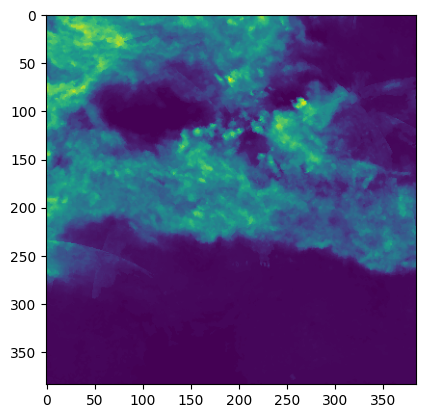

In [19]:
import matplotlib.pyplot as plt
plt.imshow(sample_image)

LETS DO THE SAME WITH VIS

In [ ]:
!aws s3 ls --no-sign-request s3://sevir/data/vis --recursive --human-readable --region us-west-2

In [21]:
!aws s3 cp --no-sign-request --region us-west-2 s3://sevir/data/vis/2019/SEVIR_VIS_RANDOMEVENTS_2019_0711_0720.h5 ~/vis/2019/SEVIR_VIS_RANDOMEVENTS_2019_0711_0720.h5

download: s3://sevir/data/vis/2019/SEVIR_VIS_RANDOMEVENTS_2019_0711_0720.h5 to ../root/vis/2019/SEVIR_VIS_RANDOMEVENTS_2019_0711_0720.h5


In [24]:
import numpy as np
import h5py

hf_vis = h5py.File('../root/vis/2019/SEVIR_VIS_RANDOMEVENTS_2019_0711_0720.h5', 'r')

print(f"keys: {hf_vis.keys()}")

keys: <KeysViewHDF5 ['id', 'vis']>


In [31]:
hf_vis_id = hf_vis.get('id')
hf_vis_vis = hf_vis.get('vis')

In [32]:
vis_arr = np.array(hf_vis_vis)

In [33]:
vis_arr.shape

(40, 768, 768, 49)

In [36]:
sample_image_vis = vis_arr[10,:,:,13]

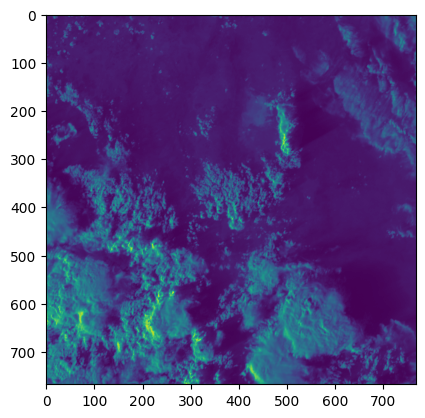

In [37]:
import matplotlib.pyplot as plt
plt.imshow(sample_image_vis)

STORE OUR OWN FILES IN NEW H5 FILES

In [ ]:
!git clone https://github.com/leahandofir/earthformer-inference-experiments.git

In [ ]:
# installing PyPng
!python -m pip install git+https://gitlab.com/drj11/pypng@pypng-0.20220715.0

In [79]:
import png